# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 5 - Medidas de Centralidad

In [1]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random

### Red de football

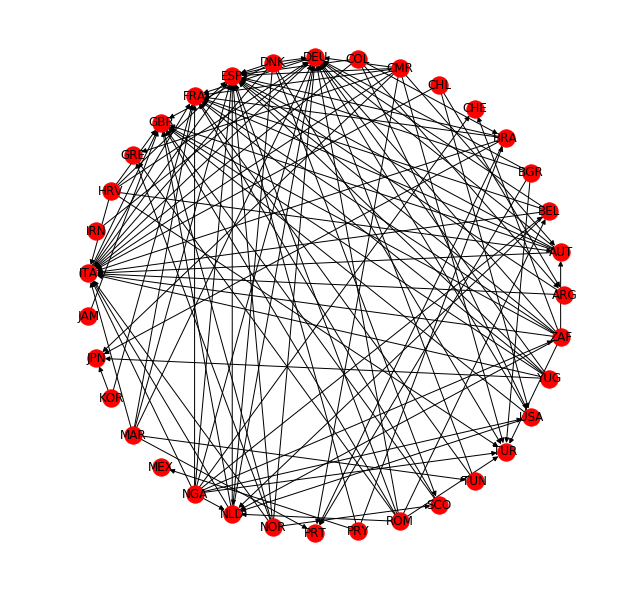

In [2]:
G = nx.DiGraph(nx.read_pajek('football.net'))
plt.figure(figsize=(8,8))
nx.draw(G, nx.circular_layout(G), with_labels=True)

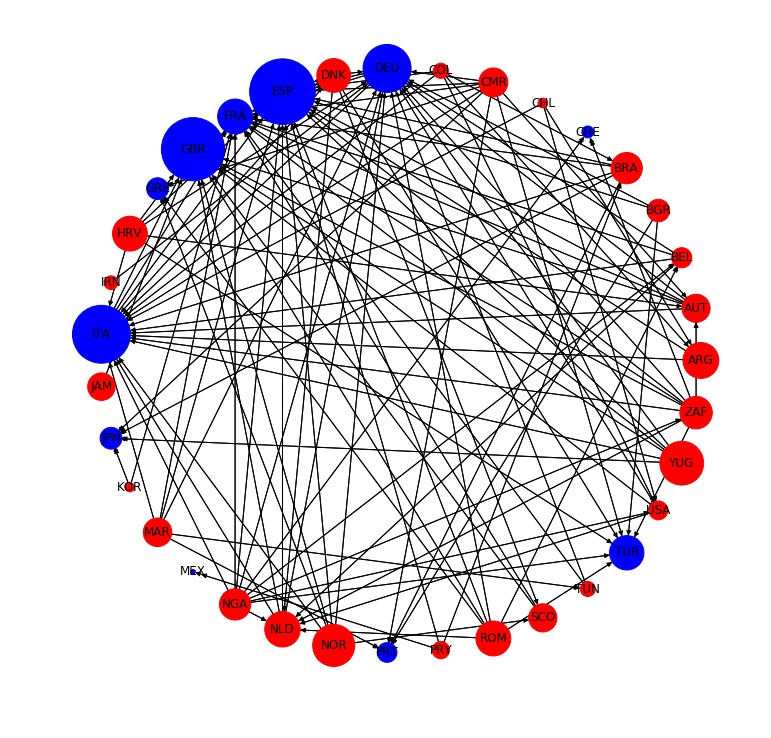

In [6]:
# Calcular medidas de centralidad
hubs, auth = nx.hits(G)
nodos = []
color = []

    
for i,j in zip(hubs.values(),auth.values()):
    if i >= j:
        nodos.append(i*20000)
        color.append('r')
    elif j > i:
        nodos.append(j*20000)
        color.append('b')
    
plt.figure(figsize=(13,13))    
pos = nx.circular_layout(G)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw(G,pos, node_size = nodos, node_color = color)

#### Hemos considerado que es mejor utilizar Hits porque queremos responder a la pregunta de qué país exporta más jugadores a la mejores ligas, y qué liga recibe jugdaores de los mejores países. Dada esta red podemos ver que tenemos dos conceptos: las selecciones y las ligas, por lo que Hits nos permite diferenciar muy bien esos dos conceptos gracias a los Hubs y los Authorities.

#### Como podemos ver en la red que nos ha mostrado, hay más Hubs (color rojo) que Authorities (color azul), lo cual tiene todo el sentido del mundo ya que ligas "importantes" hay muy pocas. Sin embargo sí que hay más países que exportan jugadores.

### Red de familias de florentinas del renacimiento

C:\Users\mario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


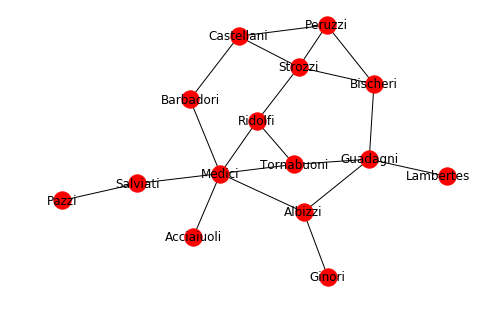

In [7]:
G = nx.florentine_families_graph()
nx.draw(G, nx.kamada_kawai_layout(G), with_labels=True)

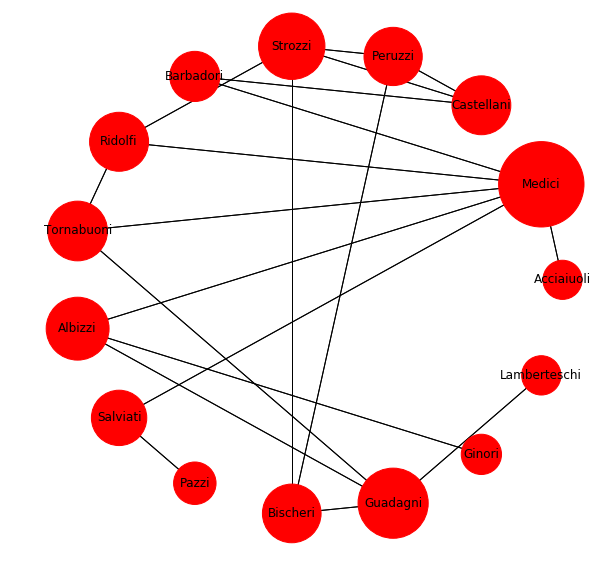

In [8]:
# Calcular medidas de centralidad
# Hemos considerado que es mejor utilizar ... porque ...
katz = nx.pagerank(G)
katz_nodos = []

for i in katz.values():
    katz_nodos.append(i*50000)
    
plt.figure(figsize=(10,10))    
pos = nx.circular_layout(G)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw(G,pos, node_size = katz_nodos)

#### En este caso hemos elegido la medida de centralidad pageRank, esto se debe a que es una medida que representa muy bien la importancia de cada una de la familias, de tal forma que a mayor pageRank mayor es la influencia de dicha familia (con esto respondemos a la pregunta que se nos pedía).

#### Como podemos observar en la red anterior, hay un enlace por cada matrimonio entre familias, los Medici están relacionados con familias "importantes" (con familias que tienen un elevado pageRank, esto hace que el pageRank de los Medici aumente). Sin embargo los Pazzi no, es por ello que los Medici tienen más influencia que los Pazzi.